In [1]:
import pandas as pd

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
print(pd.unique(fish['Species'])) # Species 컬럼에서 고유한 값 추출

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
print(fish['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


### 7개 생선의 종류를 예측해야 한다!

In [5]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [6]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
fish_target = fish['Species'].to_numpy() # 다중분류

- 다중 분류(multiclass classification): 타깃 데이터에 2개 이상의 클래스가 포함된 문제
- 다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있다.
- sklearn 에서는 문자열로 된 타깃값을 그대로 사용할 수 있다.

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input) # 훈련 세트의 통계값으로 변환
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [11]:
print(kn.classes_) # 저장된 target 값 (알파벳 순으로 자동 정렬)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
print(kn.predict(test_scaled[:5])) # target값을 그대로 예측으로 출력

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [13]:
import numpy as np

In [14]:
proba = kn.predict_proba(test_scaled[:5]) # 클래스 별 확률값을 반환
print(np.round(proba, decimals = 4)) # 소수점 4째자리까지 반환, 기본값은 첫째 자리에서 반올림

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [15]:
# 4번째 샘플의 최근접 이웃의 클래스 확인
distances, indexes = kn.kneighbors(test_scaled[3:4]) # slicing 연산자는 하나의 샘플만 선택해도 항상 2차원 배열이 만들어짐
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


- 5번째 클래스인 Roach에 대한 확률이 1/3 = 0.3333 으로 동일
- 3번째 클래스인 Perch에 대한 확률이 2/3 = 0.6666 으로 동일
- 3개의 최근접 이웃을 사용하기 때문에 가능한 확률이 0, 1/3, 2/3, 1이 전부

## Logistic Regression
- 이름은 회귀이지만 분류 모델
- 선형 회귀와 동일하게 선형 방정식을 학습
- z = a * Weight + b * Length + c * Diagonal + d * Height + e * Width + f
- z는 어떤 값도 가능
- solver 매겨변수에서 사용할 알고리즘 선택
- penalty 매개변수로 규제 방식 선택
- C 매개변수로 규제의 강도 조정
- max_iter 매개변수로 반복횟수 조정

### Sigmoid Function (Logistic Function)
- z가 확률이 되려면 0과 1사이의 값이 되어야 함
- z가 아주 큰 음수일 때 0이 되고, z가 아주 큰 양수일 때 1이 되도록 바꾸는 방법
- 1/1+exp(-z)
- 확률로 해석 가능!

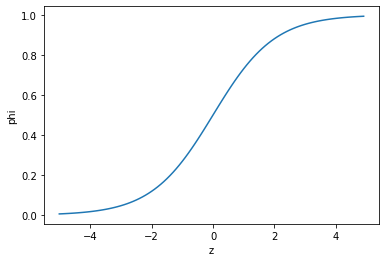

In [16]:
# sigmoid function
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 이진 분류
- 0.5보다 크면 양성 class
- 0.5보다 작으면 음성 class
- 0.5이면 음성 class (sklearn 기준)

In [17]:
# boolean indexing example
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]]) # numpy 배열은 True, False 값을 전달하여 행을 선택할 수 있음

['A' 'C']


In [18]:
bream_smelt_indexes = (train_target == 'Bream')|(train_target == 'Smelt') # 도미와 빙어에 bool형인 True 할당

In [19]:
print(bream_smelt_indexes)

[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]


In [20]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes] # boolean indexing 으로 도미와 빙어 데이터만 추출 

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [22]:
# 처음 5개 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [23]:
# 처음 5개 샘플에 대한 확률
print(lr.predict_proba(train_bream_smelt[:5])) # 첫 번째 컬럼이 음성class, 두 번째 컬럼이 양성class
                                               # 알파벳 순서로 bream, smelt

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


- prdict_proba 메서드는 예측 확률을 반환
- 이진 분류일 경우에는 샘플마다 음성 클래스와 양성 클래스에 대한 확률을 반환
- 다중 분류일 경우에는 샘플마다 모든 클래스에 대한 확률을 반환

In [24]:
print(lr.classes_)

['Bream' 'Smelt']


In [25]:
print(lr.coef_, lr.intercept_) # logistic regression이 학습한 회귀 계수

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [26]:
# z값 계산
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [27]:
# sigmoid 함수를 이용한 확률 계산
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


- decision_function 메서드는 양성 클래스에 대한(성공에 대한) z값을 반환
- 0을 기준으로 양수이면 양성, 음수이면 음성 클래스
- sigmoid 함수를 이용하여 계산한 확률은 predict_proba 메서드 출력의 두 번째 열의 값과 동일


### 다중 분류 - Logistic Regression
-


In [28]:
lr = LogisticRegression(C = 20, max_iter = 1000) # C의 기본값은 1, max_iter의 기본값은 100
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target)) # 훈련 세트와 테스트 세트에 대한 점수가 높고 적절한 적합

0.9327731092436975
0.925


In [29]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [30]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [31]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [32]:
print(lr.coef_, lr.intercept_)

[[-1.49002087 -1.02912886  2.59345551  7.70357682 -1.2007011 ]
 [ 0.19618235 -2.01068181 -3.77976834  6.50491489 -1.99482722]
 [ 3.56279745  6.34357182 -8.48971143 -5.75757348  3.79307308]
 [-0.10458098  3.60319431  3.93067812 -3.61736674 -1.75069691]
 [-1.40061442 -6.07503434  5.25969314 -0.87220069  1.86043659]
 [-1.38526214  1.49214574  1.39226167 -5.67734118 -4.40097523]
 [ 0.62149861 -2.32406685 -0.90660867  1.71599038  3.6936908 ]] [-0.09205179 -0.26290885  3.25101327 -0.14742956  2.65498283 -6.78782948
  1.38422358]


- 5개의 특성을 사용하므로 coef_의 배열의 컬럼은 5개
- 클래스마다 z값을 하나씩 계산하므로 7개의 행

In [33]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


### Softmax Function
- 여러 개의 선형 방정식의 출력값을 0과 1사이의 값으로 압축
- 전체 합이 1이 되도록 만든다.
- 정규화된 지수 
- e_sum = exp(z1) + exp(z2) + exp(z3) + exp(z4) + exp(z5) + exp(z6) + exp(z7)
- s1 = exp(z1)/e_sum
- s2 = exp(z2)/e_sum
- ......

In [34]:
# z값 계산
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


- decision_function 은 각 클래스 마다 선형 방정식을 계산
- 가장 큰 값의 클래스가 예측 클래스가 됨

In [35]:
# softmax function 이용한 확률 계산
from scipy.special import softmax

proba = softmax(decision, axis = 1) # 각 샘플(axis = 1)에 대하여 소프트 맥스를 계산
print(np.round(proba, decimals = 3)) # 앞서 계산한 proba 배열과 동일

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


### 정리
- 로지스틱 회귀는 회귀 모델이 아닌 분류 모델!
- 선형 회귀처럼 선형 방정식을 학습하지만 계산한 값을 0과 1사이의 값으로 압축
- 이진 분류에서는 하나의 선형 방정식을 훈련하여 sigmoid 함수에 통과시켜 0과 1사이의 값으로 압축
- 다중 분류일 경우 클래스의 개수만큼 방정식을 훈련하여 각 출력값을 softmax 함수를 통과시켜 전체 클래스에 대한 합이 1이 되도록 정규화